In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

# Test1

In [3]:
files = {}
for i in range(10, 1000, 10):
    val = glob.glob(f'csv/columns_n/csv_c1000_n{i}_r1000_fn*_mode2_div*_cut*')
    if val != []:
        files[i] = val


print(len(files))

# iterazione sui file e concatenazione dei dati
dataframes = []
for i in files:
    for filename in files[i]:
        df = pd.read_csv(filename)
        df['n'] = i
        dataframes.append(df)

result = pd.concat(dataframes, axis=0, ignore_index=True)

result[result['type']=='uncorr']


99


,type,capacity,t_v1,t_v2,s_v1,s_v2,time_v1,time_v2,n
0,uncorr,1000,1001,1001,38,38,0.000181,0.000134,10
5,uncorr,1000,1001,1001,283,309,0.000607,0.000406,20
10,uncorr,1000,1001,1001,529,579,0.001646,0.001298,30
15,uncorr,1000,1001,1001,713,836,0.002828,0.002267,40
20,uncorr,1000,1001,1001,786,866,0.004846,0.004101,50
...,...,...,...,...,...,...,...,...,...
470,uncorr,1000,1001,1001,997,997,1.324148,0.870860,950
475,uncorr,1000,1001,1001,998,999,1.333692,0.836142,960
480,uncorr,1000,1001,1001,998,999,1.416151,0.850950,970
485,uncorr,1000,1001,1001,998,999,1.414863,0.873483,980


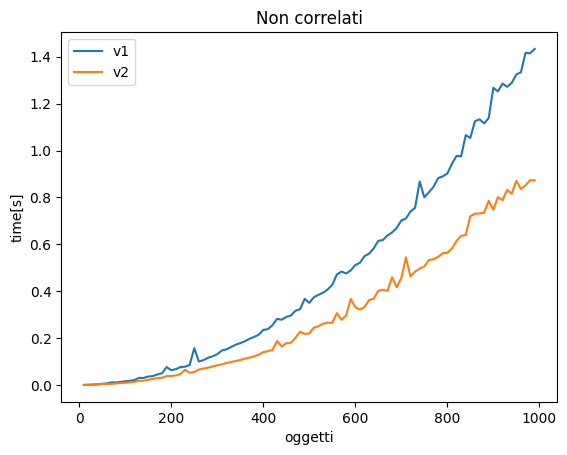

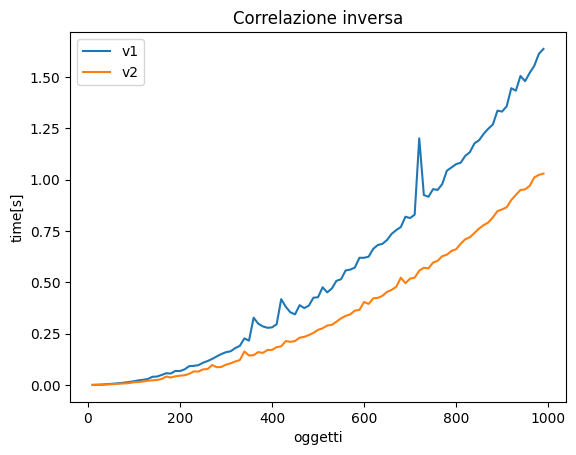

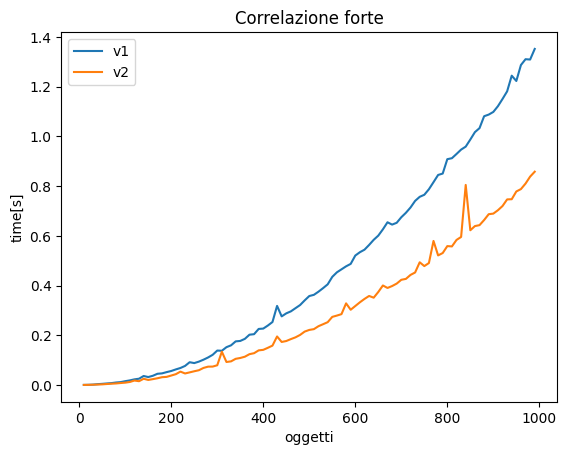

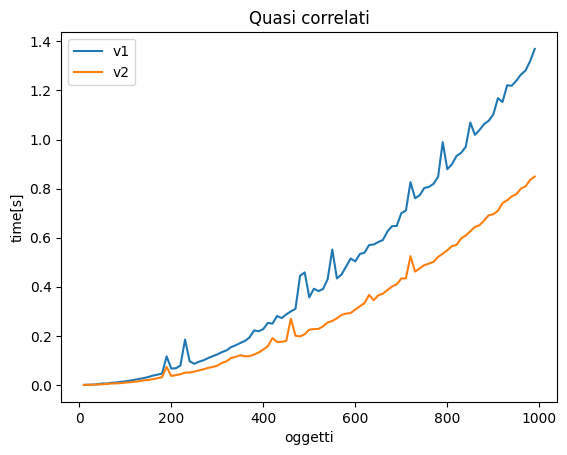

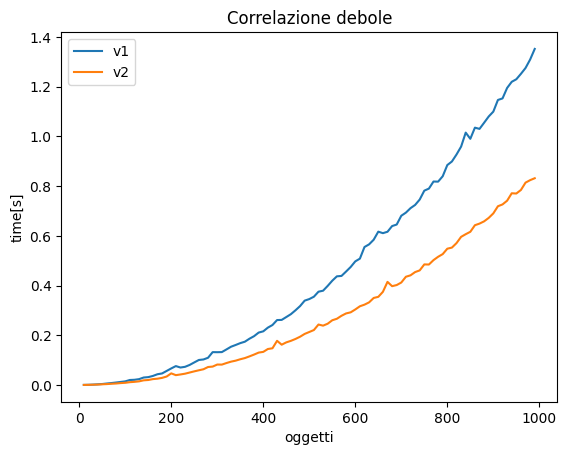

In [5]:
# files = {}
# for i in range(10, 1000, 10):
#     val = glob.glob(f'csv/csv_c1000_n{i}_r1000_fn*_mode2_div*_cut*')
#     if val != []:
#         files[i] = val

# files

# # csv_files = glob.glob('csv/csv_c1000_n20_r1000_fn*_mode2_div*_cut*')

# dataframes = []
# for filename in files:
#     df = pd.read_csv(filename)
#     dataframes.append(df)

# result = pd.concat(dataframes, axis=0, ignore_index=True)

# result
# selezione dei file CSV

# result = result[result['type']=='uncorr']

# #items_range = np.arange(0, 1000, 10).flatten();

# timev1 = result[['time_v1']]
# # timev2 = result[['time_v2']]

# size_n = len(result['type']=='uncorr')

# print(size_n)

# n = np.zeros(size_n)

# n = np.arange(10, 1000, 10)

# cumval = 10
# for i, j in enumerate(range(10, size_n+1, 10)):
#     n[i] = j

# print(n)
# plt.plot(n, timev1, label='v1')
# plt.plot(n, timev2, label='v2')
# plt.xlabel('oggetti')
# plt.ylabel('tempo[s]')
# plt.legend()
# plt.show()
n = result['n'].unique()

types = ['uncorr', 'inv', 'str', 'almost', 'weak']
types_conv = ['Non correlati', 'Correlazione inversa', 'Correlazione forte', 'Quasi correlati', 'Correlazione debole']

for cont, i in enumerate(types):
    result1 = result[result['type']==i]
    
    
    sv1 = result1['time_v1']
    sv2 = result1['time_v2']


    plt.plot(n, sv1, label='v1')
    plt.plot(n, sv2, label='v2')
    plt.xlabel('oggetti')
    plt.ylabel('time[s]')
    plt.title(types_conv[cont])
    plt.legend()
    plt.show()


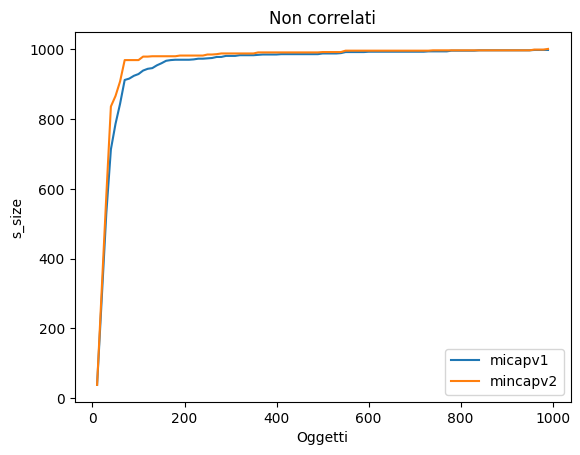

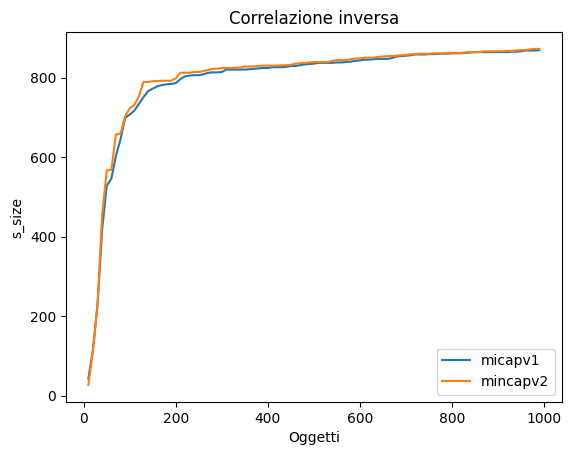

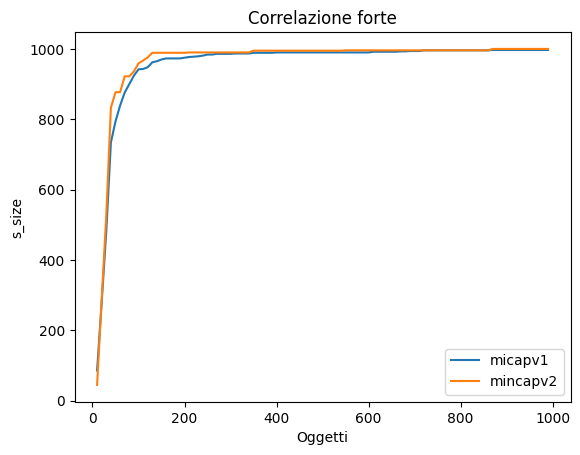

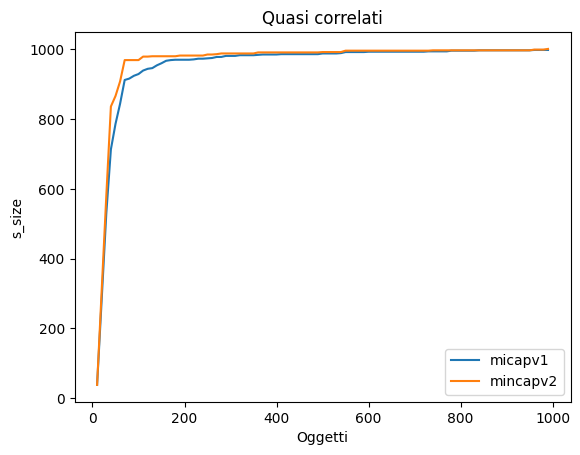

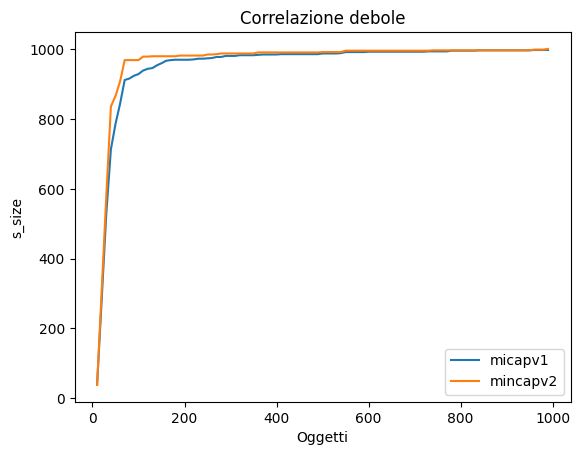

In [10]:
sv1 = result['s_v1']
sv2 = result['s_v2']

# plt.plot(n, sv1, label='v1')
# plt.plot(n, sv2, label='v2')
# plt.xlabel('oggetti')
# plt.ylabel('s_size')
# plt.legend()
# plt.show()

for cont, i in enumerate(types):
    result1 = result[result['type']==i]
    
    sv1 = result1['s_v1']
    sv2 = result1['s_v2']

    plt.plot(n, sv1, label='micapv1')
    plt.plot(n, sv2, label='mincapv2')
    plt.xlabel('Oggetti')
    plt.ylabel('s_size')
    plt.title(types_conv[cont])
    plt.legend()
    plt.show()


media


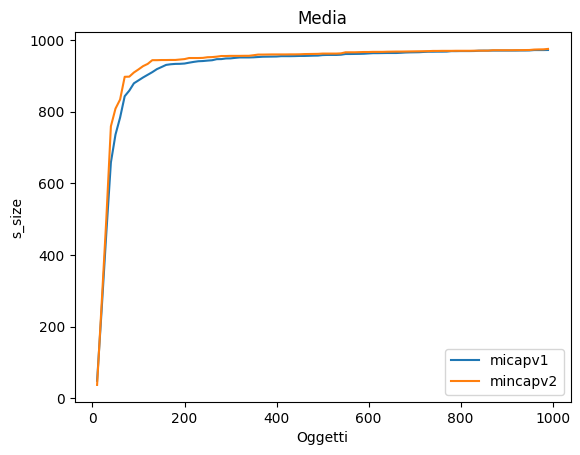

In [17]:
#media
print("media")
sv1 = result[['s_v1','n']].groupby('n').mean()
sv2 = result[['s_v2','n']].groupby('n').mean()

plt.plot(n, sv1, label='micapv1')
plt.plot(n, sv2, label='mincapv2')
plt.xlabel('Oggetti')
plt.ylabel('s_size')
plt.title("Media")
plt.legend()
plt.show()




# Test 2

In [18]:
files = {}
for i in range(10, 1000, 10):
    val = glob.glob(f'csv/columns/csv_c1000_n500_r{i}_fn*_mode2_div*_cut*')
    if val != []:
        files[i] = val

# iterazione sui file e concatenazione dei dati
dataframes = []
for i in files:
    for filename in files[i]:
        df = pd.read_csv(filename)
        df['range'] = i
        dataframes.append(df)

result = pd.concat(dataframes, axis=0, ignore_index=True)
ranges = result['range'].unique()
result

,type,capacity,n,t_v1,t_v2,s_v1,s_v2,time_v1,time_v2,range
0,uncorr,1000,500,1001,1001,1001,1001,0.009779,0.004085,10
1,almost,1000,500,1001,1001,1001,1001,0.007184,0.003623,10
2,inv,1000,500,1001,1001,1000,1000,0.006043,0.004493,10
3,str,1000,500,1001,1001,1001,1001,0.005781,0.002955,10
4,weak,1000,500,1001,1001,1001,1001,0.005371,0.004071,10
...,...,...,...,...,...,...,...,...,...,...
490,uncorr,1000,500,1001,1001,998,1001,0.538610,0.309809,990
491,almost,1000,500,1001,1001,998,1001,0.519000,0.331748,990
492,inv,1000,500,1001,1001,842,844,0.707432,0.480033,990
493,str,1000,500,1001,1001,999,1001,0.588526,0.299580,990


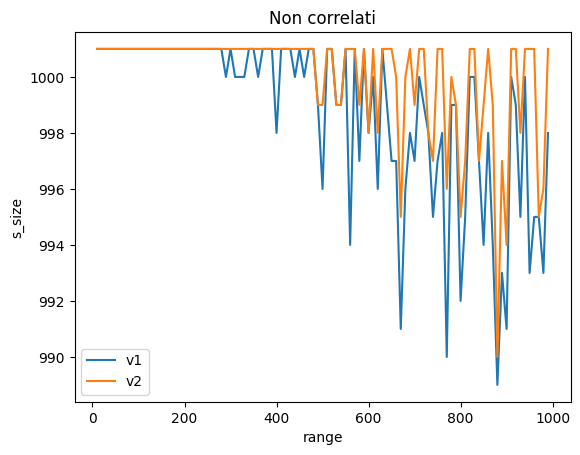

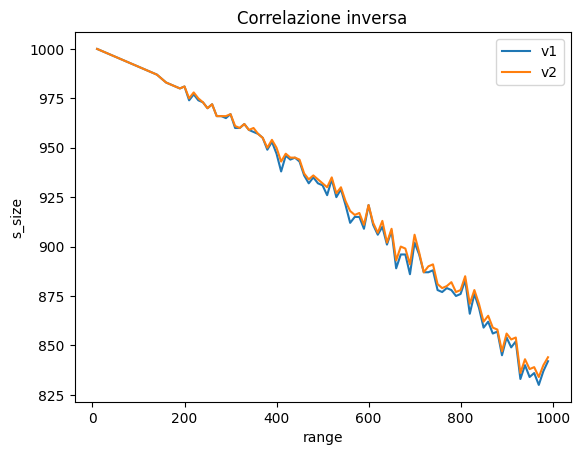

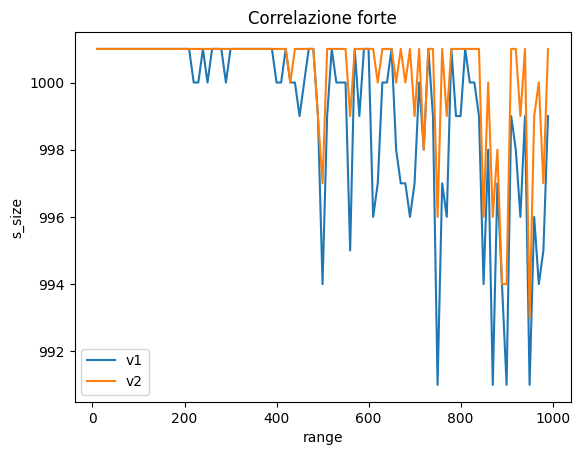

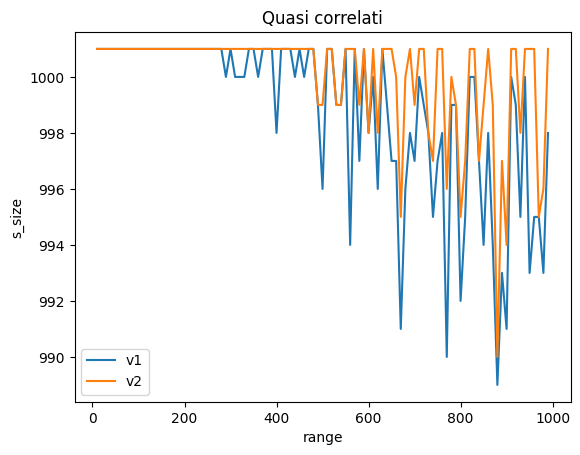

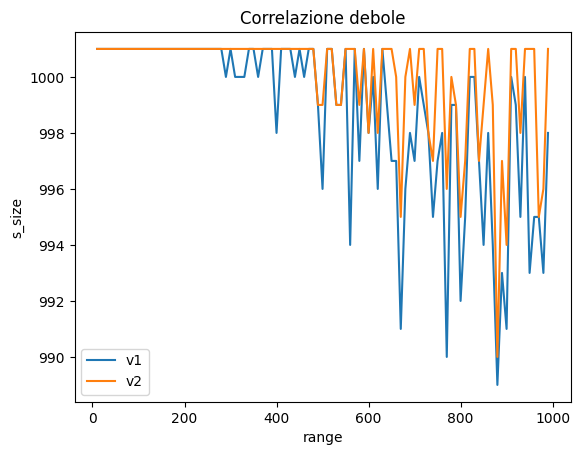

In [19]:
types = ['uncorr', 'inv', 'str', 'almost', 'weak']
types_conv = ['Non correlati', 'Correlazione inversa', 'Correlazione forte', 'Quasi correlati', 'Correlazione debole']

for cont, i in enumerate(types):
    result1 = result[result['type']==i]
    #print(result1.head(10))
    sv1 = result1['s_v1']
    sv2 = result1['s_v2']

    plt.plot(ranges, sv1, label='v1')
    plt.plot(ranges, sv2, label='v2')
    plt.xlabel('range')
    plt.ylabel('s_size')
    plt.title(types_conv[cont])
    plt.legend()
    plt.show()

# define the number of rows and columns for the subplots
# num_rows = len(types)
# num_cols = 1
# # create the figure and subplots
# fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 10))

# # iterate over the types and create the subplots
# for cont, i in enumerate(types):
#     result1 = result[result['type']==i]
#     sv1 = result1['s_v1']
#     sv2 = result1['s_v2']
    
#     # plot sv1 in the current subplot
#     axs[cont].plot(sv1)
#     axs[cont].plot(sv2)
#     axs[cont].set_xlabel('oggetti')
#     axs[cont].set_ylabel('s_size')
#     axs[cont].set_title(types_conv[cont])


# # add a common title to the figure
# fig.suptitle('My Subplots')

# # display the figure
# plt.show()

# Esecuzione KS

In [ ]:
types = ['uncorr', 'inv', 'str', 'almost', 'weak']
types_conv = ['Non correlati', 'Correlazione inversa', 'Correlazione forte', 'Quasi correlati', 'Correlazione debole']
